In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, ks_2samp
import pickle

In [2]:

# Carica i dati dal file
with open('/content/drive/MyDrive/Progetto DSN/Analysis_Data/num_leaves.pkl', 'rb') as file:
    data = pickle.load(file)

    num_leaves_VISp = data['VISp']
    num_leaves_VISal = data['VISal']
    num_leaves_SSp_bfd = data['SSp_bfd']

In [4]:
num_leaves_VISp[0]

498

Statistiche descrittive per VISp: {'mean': 316.28409090909093, 'std': 310.94017799627534, 'median': 204.0}
Statistiche descrittive per VISal: {'mean': 354.3125, 'std': 222.67822040727287, 'median': 270.5}
Statistiche descrittive per SSp_bfd: {'mean': 384.5181818181818, 'std': 289.2701075534196, 'median': 319.0}


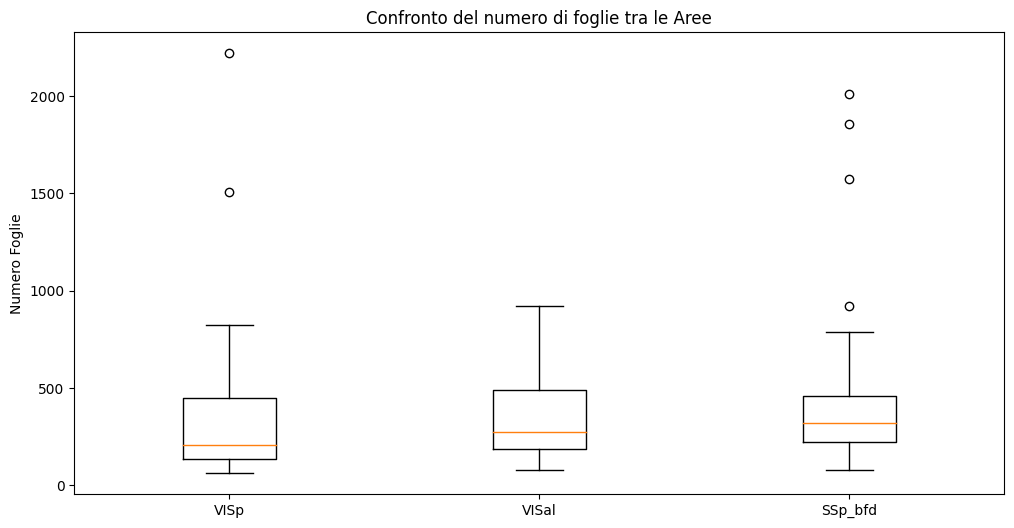

In [ ]:
def descriptive_statistics(data):
    return {
        'mean': np.mean(data),
        'std': np.std(data),
        'median': np.median(data)
    }

# Calcolare le statistiche descrittive per ciascuna area
desc_stats_VISp = descriptive_statistics(num_leaves_VISp)
desc_stats_VISal = descriptive_statistics(num_leaves_VISal)
desc_stats_SSp_bfd = descriptive_statistics(num_leaves_SSp_bfd)

print("Statistiche descrittive per VISp:", desc_stats_VISp)
print("Statistiche descrittive per VISal:", desc_stats_VISal)
print("Statistiche descrittive per SSp_bfd:", desc_stats_SSp_bfd)

# Visualizzazione dei risultati
plt.figure(figsize=(12, 6))
plt.boxplot([num_leaves_VISp, num_leaves_VISal, num_leaves_SSp_bfd], labels=['VISp', 'VISal', 'SSp_bfd'])
plt.ylabel('Numero Foglie')
plt.title('Confronto del numero di foglie tra le Aree')
plt.show()

In [ ]:
t_stat_VISp_VISal, p_value_VISp_VISal = ttest_ind(num_leaves_VISp, num_leaves_VISal)
t_stat_VISp_SSp_bfd, p_value_VISp_SSp_bfd = ttest_ind(num_leaves_VISp, num_leaves_SSp_bfd)
t_stat_VISal_SSp_bfd, p_value_VISal_SSp_bfd = ttest_ind(num_leaves_VISal, num_leaves_SSp_bfd)

print(f"T-test VISp vs VISal: t-statistic = {t_stat_VISp_VISal} , p-value = {p_value_VISp_VISal}")
print(f"T-test VISp vs SSp_bfd: t-statistic = {t_stat_VISp_SSp_bfd} , p-value = {p_value_VISp_SSp_bfd}")
print(f"T-test VISal vs SSp_bfd: t-statistic = {t_stat_VISal_SSp_bfd} , p-value = {p_value_VISal_SSp_bfd}")

# Eseguire il KS-test
ks_stat_VISp_VISal, ks_p_value_VISp_VISal = ks_2samp(num_leaves_VISp, num_leaves_VISal)
ks_stat_VISp_SSp_bfd, ks_p_value_VISp_SSp_bfd = ks_2samp(num_leaves_VISp, num_leaves_SSp_bfd)
ks_stat_VISal_SSp_bfd, ks_p_value_VISal_SSp_bfd = ks_2samp(num_leaves_VISal, num_leaves_SSp_bfd)

print(f"KS-test VISp vs VISal: ks-statistic = {ks_stat_VISp_VISal} , p-value = {ks_p_value_VISp_VISal}")
print(f"KS-test VISp vs SSp_bfd: ks-statistic = {ks_stat_VISp_SSp_bfd} , p-value = {ks_p_value_VISp_SSp_bfd}")
print(f"KS-test VISal vs SSp_bfd: ks-statistic = {ks_stat_VISal_SSp_bfd} , p-value = {ks_p_value_VISal_SSp_bfd}")

T-test VISp vs VISal: t-statistic = -0.629830340296038 , p-value = 0.5300232631092101
T-test VISp vs SSp_bfd: t-statistic = -1.5870571649627832 , p-value = 0.11411162480034001
T-test VISal vs SSp_bfd: t-statistic = -0.541681919005437 , p-value = 0.5888986780531477
KS-test VISp vs VISal: ks-statistic = 0.23579545454545456 , p-value = 0.12498501080186267
KS-test VISp vs SSp_bfd: ks-statistic = 0.3704545454545455 , p-value = 1.797761697305425e-06
KS-test VISal vs SSp_bfd: ks-statistic = 0.20625 , p-value = 0.2076377850450103


### Commento sui risultati:

#### Test t di Student:

1. **T-test VISp vs VISal:**
   - **t-statistic = -0.629830340296038**
   - **p-value = 0.5300232631092101**
   
   **Interpretazione:** La statistica t non è significativa (p > 0.05). Questo indica che non c'è una differenza statisticamente significativa nel numero medio di foglie tra i neuroni nelle aree VISp e VISal. In altre parole, i neuroni di queste due aree hanno un numero medio di foglie simile.

2. **T-test VISp vs SSp_bfd:**
   - **t-statistic = -1.5870571649627832**
   - **p-value = 0.11411162480034001**
   
   **Interpretazione:** Anche in questo caso, la statistica t non è significativa (p > 0.05), indicando che non c'è una differenza statisticamente significativa nel numero medio di foglie tra i neuroni nelle aree VISp e SSp_bfd. Tuttavia, il p-value è più vicino a 0.05 rispetto al confronto precedente, suggerendo una possibile tendenza verso una differenza, ma non abbastanza forte per essere conclusiva.

3. **T-test VISal vs SSp_bfd:**
   - **t-statistic = -0.541681919005437**
   - **p-value = 0.5888986780531477**
   
   **Interpretazione:** La statistica t non è significativa (p > 0.05). Non c'è una differenza statisticamente significativa nel numero medio di foglie tra i neuroni nelle aree VISal e SSp_bfd, suggerendo che il numero medio di foglie è simile anche in queste aree.

#### Test di Kolmogorov-Smirnov (KS):

1. **KS-test VISp vs VISal:**
   - **ks-statistic = 0.23579545454545456**
   - **p-value = 0.12498501080186267**
   
   **Interpretazione:** La statistica KS non è significativa (p > 0.05), indicando che non c'è una differenza statisticamente significativa nella distribuzione del numero di foglie tra i neuroni nelle aree VISp e VISal. Le distribuzioni sono simili.

2. **KS-test VISp vs SSp_bfd:**
   - **ks-statistic = 0.3704545454545455**
   - **p-value = 1.797761697305425e-06**
   
   **Interpretazione:** La statistica KS è significativa (p < 0.05), indicando una differenza statisticamente significativa nella distribuzione del numero di foglie tra i neuroni nelle aree VISp e SSp_bfd. Questo suggerisce che le distribuzioni del numero di foglie in queste due aree sono diverse.

3. **KS-test VISal vs SSp_bfd:**
   - **ks-statistic = 0.20625**
   - **p-value = 0.2076377850450103**
   
   **Interpretazione:** La statistica KS non è significativa (p > 0.05), indicando che non c'è una differenza statisticamente significativa nella distribuzione del numero di foglie tra i neuroni nelle aree VISal e SSp_bfd. Le distribuzioni sono simili.

### Sintesi:

- **Test t di Student:** Non mostrano differenze significative tra le aree, suggerendo che i numeri medi di foglie sono simili tra le aree confrontate.
- **Test di Kolmogorov-Smirnov:** Rivelano una differenza significativa tra VISp e SSp_bfd, indicando che la distribuzione del numero di foglie nei neuroni di queste due aree è diversa. Tuttavia, le altre combinazioni di aree non mostrano differenze significative.

### Conclusioni:

I risultati suggeriscono che mentre il numero medio di foglie potrebbe essere simile tra le diverse aree corticali, le distribuzioni possono differire in modo significativo, in particolare tra VISp e SSp_bfd. Questo potrebbe indicare differenze strutturali più sottili nella morfologia dei neuroni tra queste aree.